# Exploration der Word2vec Embeddings 2

- ohne Bigramme
- vector_size: 300
- window: 5
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v11.model'))
w2v12 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v12.model'))
w2v13 = Word2Vec.load(os.path.join('../trained_models/Word2Vec2', '2w2v13.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1975', '1976-2000', '2001-2010', '2011-2016', '2017-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11, w2v12, w2v13] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')

In [8]:
presto0

{'1700-1750': 0.3633373975753784,
 '1751-1800': 0.28687041997909546,
 '1801-1825': 0.4457051157951355,
 '1826-1850': 0.37919434905052185,
 '1851-1875': 0.3279191255569458,
 '1876-1900': 0.27340781688690186,
 '1901-1925': 0.28250792622566223,
 '1926-1950': 0.28767579793930054,
 '1951-1975': 0.4427579641342163,
 '1976-2000': 0.3045535981655121,
 '2001-2010': 0.28398337960243225,
 '2011-2016': 0.2522675096988678,
 '2017-2021': 0.3493955135345459}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

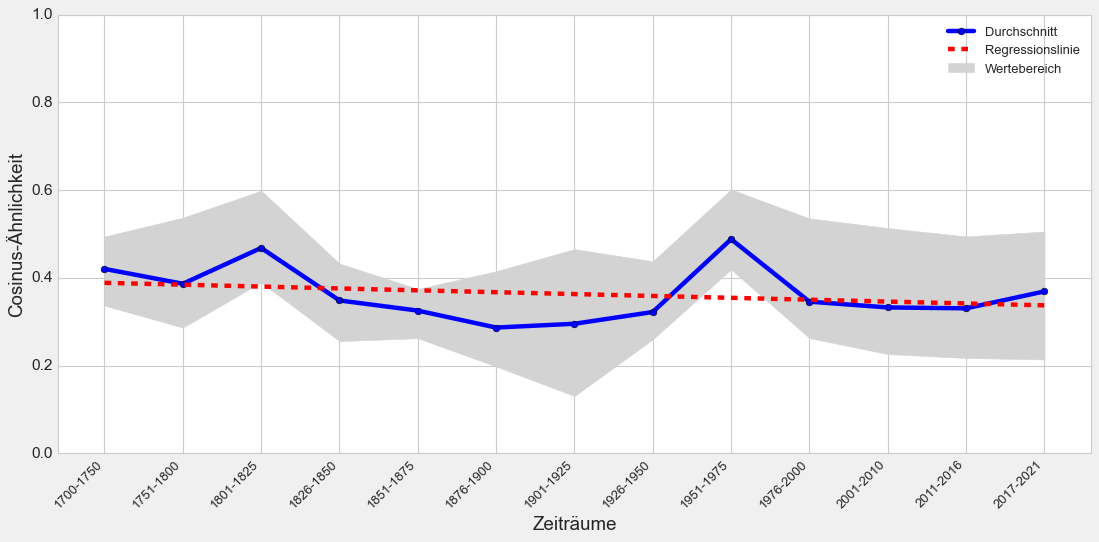

In [13]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [14]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [15]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [16]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [17]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [18]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [19]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [20]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [21]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, spesso_mean])
control_mean = dict(control_mean_df.mean())

In [22]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [23]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

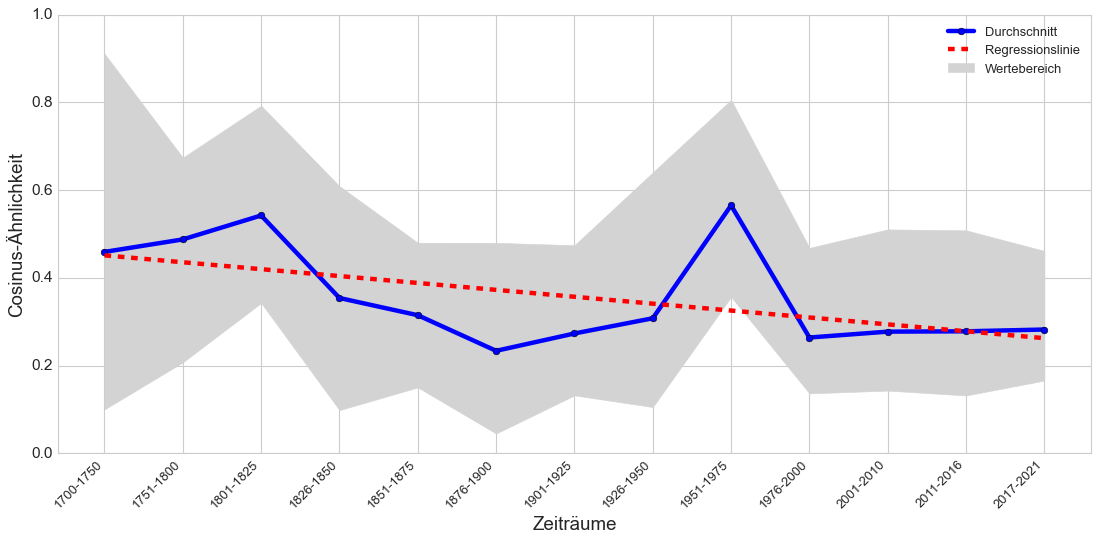

In [24]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [25]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(udiam, 0.989417552947998)","(prosegu, 0.991409957408905)","(aggiogare, 0.9921125173568726)","(inimicare, 0.9439149498939514)","(crudeltà, 0.8703456521034241)","(inflessibile, 0.72475266456604)","(riamare, 0.8813657760620117)","(angosce, 0.9245994091033936)","(fantasticare, 0.973681628704071)","(eroico, 0.8391088247299194)","(torturare, 0.8386483788490295)","(torturare, 0.8702932000160217)","(demone, 0.8470269441604614)"
1,"(sedemmi, 0.9877861738204956)","(soperchieria, 0.9912406206130981)","(simoenta, 0.991671085357666)","(vituperio, 0.9408977031707764)","(bestiale, 0.8696754574775696)","(vilipendere, 0.7127873301506042)","(cagion, 0.8729260563850403)","(atroce, 0.9160948991775513)","(avvampare, 0.9718571901321411)","(ferocia, 0.8172779083251953)","(crudeltà, 0.8153771162033081)","(oltraggiare, 0.8342689275741577)","(opprimere, 0.844728410243988)"
2,"(rispondervi, 0.9876665472984314)","(ripigliarono, 0.9907426238059998)","(sudiciume, 0.9913756251335144)","(posterità, 0.9401481747627258)","(spietato, 0.8675738573074341)","(onta, 0.7050672173500061)","(adorata, 0.8717878460884094)","(pànico, 0.9143792390823364)","(amata, 0.9714478850364685)","(crudeltà, 0.8057624101638794)","(mutilare, 0.8113331198692322)","(perseguitare, 0.8208281397819519)","(orrendo, 0.8442472219467163)"
3,"(eminentemente, 0.9875525236129761)","(vomeri, 0.9906139373779297)","(garibaldi, 0.9909610748291016)","(ricompensare, 0.9399548172950745)","(umiliazione, 0.8583756685256958)","(scatenato, 0.7028380632400513)","(sventurato, 0.8675357699394226)","(viltà, 0.9141219854354858)","(implorante, 0.9714413285255432)","(sacrificale, 0.8054339289665222)","(maledizione, 0.7994698882102966)","(accecare, 0.8193678259849548)","(crudele, 0.8340356349945068)"
4,"(giuseppina, 0.9874343872070312)","(splendide, 0.9905393123626709)","(insidiatori, 0.9906577467918396)","(immolare, 0.938568651676178)","(libidine, 0.8555707335472107)","(oppressore, 0.6947920322418213)","(fratellino, 0.8566959500312805)","(incomposto, 0.914103627204895)","(aguzzare, 0.9710730910301208)","(crudele, 0.8046786785125732)","(orrendamente, 0.7991728186607361)","(innocente, 0.8186101317405701)","(tormento, 0.8307948708534241)"
5,"(trovò, 0.9872626066207886)","(alleare, 0.9903922080993652)","(uve, 0.9906115531921387)","(redimere, 0.9377474784851074)","(obbrobrio, 0.8533374071121216)","(insulto, 0.6941623687744141)","(straziare, 0.8485032320022583)","(infrangere, 0.9129964113235474)","(protendere, 0.9706826210021973)","(atroce, 0.7988736033439636)","(dilaniare, 0.7965779304504395)","(vile, 0.8149001598358154)","(atterrita, 0.8287574648857117)"
6,"(agitar, 0.9871517419815063)","(vivido, 0.9903469681739807)","(isgozzati, 0.9905510544776917)","(dappocaggine, 0.9373986124992371)","(avvilire, 0.8531914949417114)","(contumelia, 0.6876413822174072)","(angosce, 0.8453737497329712)","(torturare, 0.9083055853843689)","(alito, 0.9700374007225037)","(cruento, 0.7986867427825928)","(insopportabile, 0.7850115299224854)","(malvagio, 0.810744047164917)","(soffocare, 0.8247889280319214)"
7,"(istate, 0.986849308013916)","(circense, 0.9903247952461243)","(luctus, 0.9904192686080933)","(calunniare, 0.9373173117637634)","(vilt, 0.8514652252197266)","(usufruttando, 0.6872634291648865)","(gelosia, 0.8448936343193054)","(rassegnazione, 0.9081193208694458)","(vampa, 0.9697293043136597)","(brigante, 0.7979944348335266)","(turba, 0.7805514931678772)","(inerme, 0.8097711205482483)","(malvagio, 0.8226498365402222)"
8,"(ponga, 0.9868206977844238)","(vammi, 0.9901864528656006)","(diavoleria, 0.9903482794761658)","(castigare, 0.9371504187583923)","(irritato, 0.8494200110435486)","(schernire, 0.6862555742263794)","(ignobile, 0.8446366786956787)","(straziare, 0.9078878164291382)","(sacerdotessa, 0.969570517539978)","(schizofrenico, 0.7975415587425232)","(sedurre, 0.7801486849784851)","(maltrattare, 0.8089213

In [26]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.5235745310783386,
 '1751-1800': 0.5621542930603027,
 '1801-1825': 0.5149449110031128,
 '1826-1850': 0.5015668869018555,
 '1851-1875': 0.4801168143749237,
 '1876-1900': 0.37278932332992554,
 '1901-1925': 0.46730437874794006,
 '1926-1950': 0.4126933515071869,
 '1951-1975': 0.5001692175865173,
 '1976-2000': 0.4597640931606293,
 '2001-2010': 0.39520180225372314,
 '2011-2016': 0.36275362968444824,
 '2017-2021': 0.386151522397995}

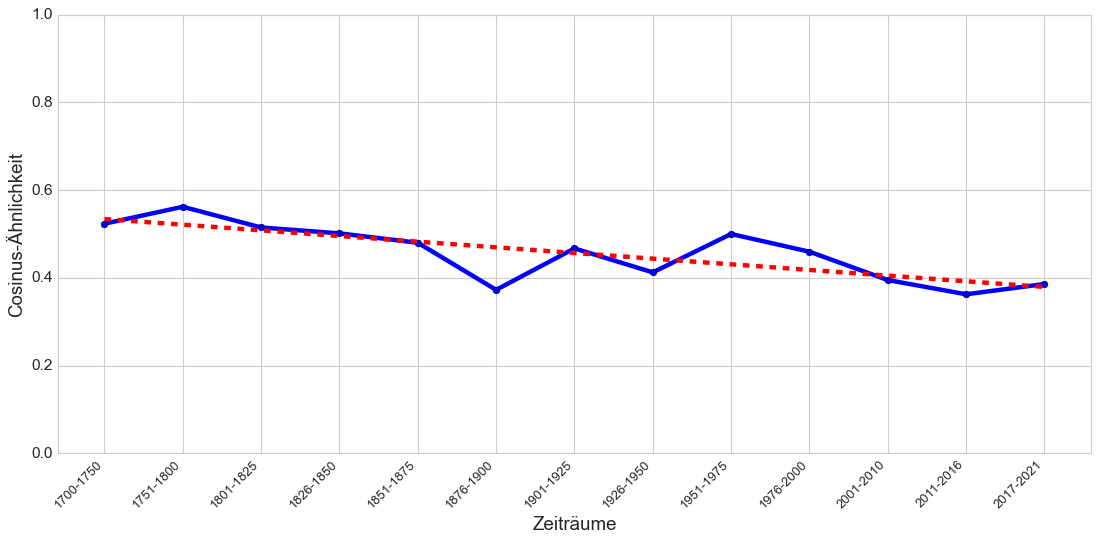

In [27]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

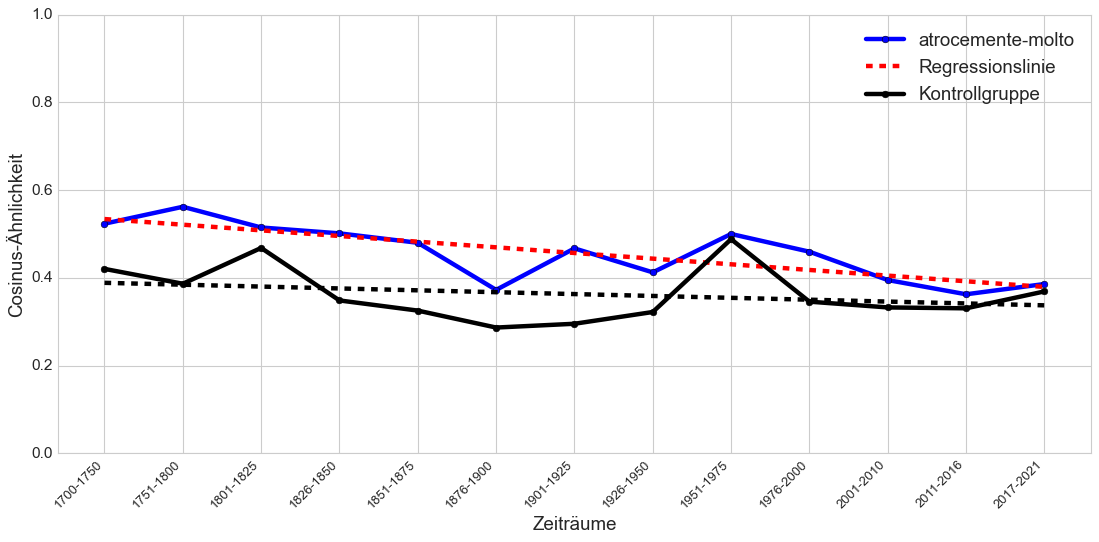

In [28]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [29]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [30]:
atrocemente1

{'1700-1750': 0.8375644087791443,
 '1751-1800': 0.6634764075279236,
 '1801-1825': 0.6602122187614441,
 '1826-1850': 0.5798313021659851,
 '1851-1875': 0.5675809979438782,
 '1876-1900': 0.42547574639320374,
 '1901-1925': 0.5045329928398132,
 '1926-1950': 0.6003531217575073,
 '1951-1975': 0.8074672222137451,
 '1976-2000': 0.41844746470451355,
 '2001-2010': 0.558686375617981,
 '2011-2016': 0.5805174112319946,
 '2017-2021': 0.6447563171386719}

In [31]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

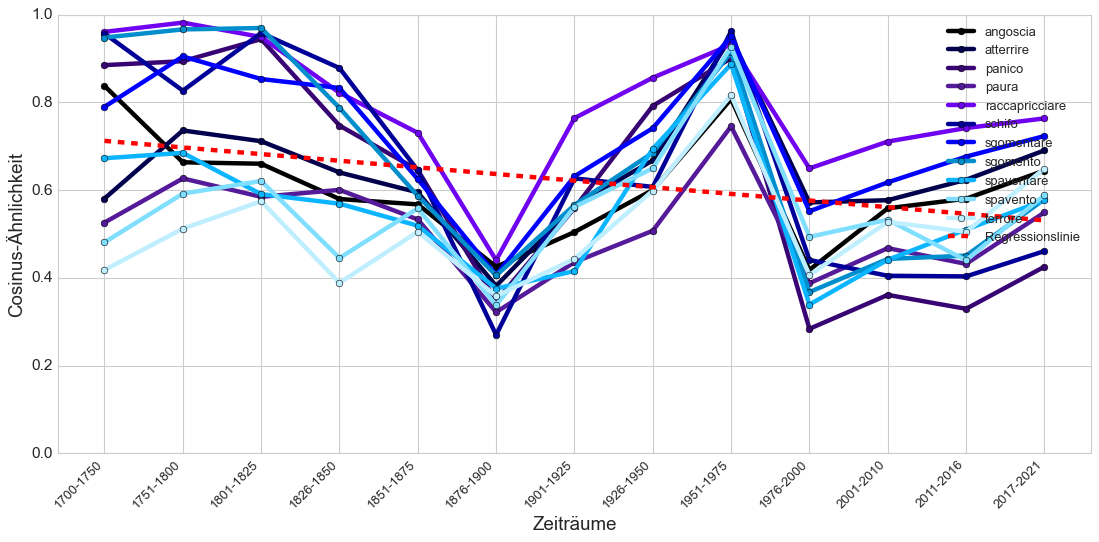

In [32]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

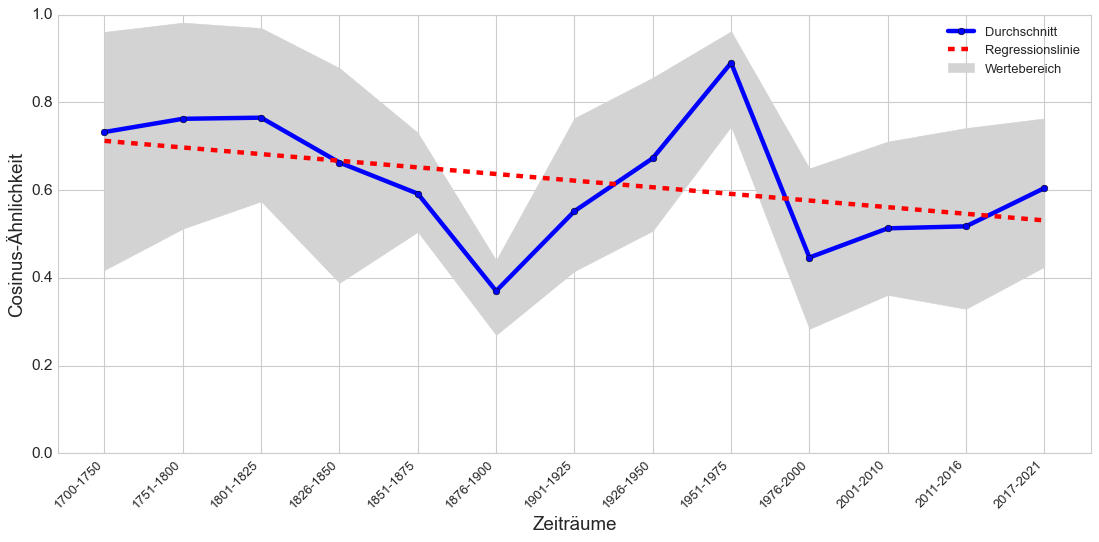

In [33]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

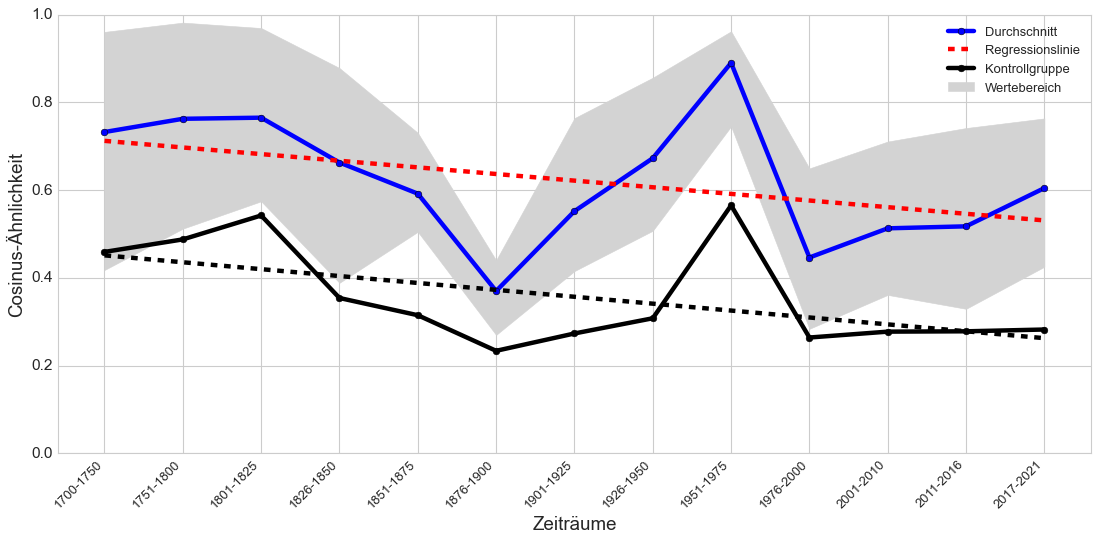

In [34]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [35]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,not in vocab,"(serotine, 0.987415611743927)","(riseghe, 0.9745392203330994)","(rincantucciandosi, 0.9218843579292297)","(frusco, 0.9510530233383179)","(newtoniane, 0.9863888621330261)",not in vocab,"(sofisticati, 0.976978063583374)","(smembrare, 0.8717825412750244)","(interiormente, 0.9258453249931335)","(permeare, 0.9171048402786255)"
1,not in vocab,not in vocab,not in vocab,"(oscuramento, 0.9866430163383484)","(spessezza, 0.9712865948677063)","(miagolare, 0.9186999797821045)","(saettare, 0.9501882791519165)","(ionizzazione, 0.9861423373222351)",not in vocab,"(paludoso, 0.9685544371604919)","(ebraismo, 0.8699340224266052)","(testardo, 0.9228330254554749)","(coesistere, 0.9168998599052429)"
2,not in vocab,not in vocab,not in vocab,"(affannate, 0.9861035346984863)","(parallelogrammo, 0.9688810110092163)","(buss, 0.9178809523582458)","(lucignolo, 0.949267566204071)","(cloroformio, 0.9848714470863342)",not in vocab,"(daghestan, 0.9675530791282654)","(stritolare, 0.8663512468338013)","(interiorità, 0.9226768016815186)","(disinteressato, 0.9150181412696838)"
3,not in vocab,not in vocab,not in vocab,"(sgorga, 0.9857978820800781)","(qr, 0.9687498211860657)","(guerino, 0.9177461266517639)","(fucileria, 0.949189305305481)","(utilizzabile, 0.9847297668457031)",not in vocab,"(gioiosa, 0.9671058654785156)","(gravitazionale, 0.8650445938110352)","(ansietà, 0.9213999509811401)","(destabilizzazione, 0.9144585728645325)"
4,not in vocab,not in vocab,not in vocab,"(erasene, 0.9857857823371887)","(acquaio, 0.968334436416626)","(scucire, 0.9164897203445435)","(fuggendola, 0.9490519762039185)","(territorii, 0.9845910668373108)",not in vocab,"(kkv, 0.9666542410850525)","(distruttore, 0.8650342226028442)","(rodere, 0.9207164645195007)","(miliare, 0.9072778820991516)"
5,not in vocab,not in vocab,not in vocab,"(guadare, 0.9856709837913513)","(riquadro, 0.9677761793136597)","(cullavano, 0.916390061378479)","(colpettini, 0.94742751121521)","(integrit, 0.9841930270195007)",not in vocab,"(colombiadi, 0.9654672741889954)","(brutalità, 0.8645415306091309)","(pipistrello, 0.9191929697990417)","(capitalistico, 0.9069177508354187)"
6,not in vocab,not in vocab,not in vocab,"(frammista, 0.9855619668960571)","(internato, 0.9667739272117615)","(tienti, 0.9148545265197754)","(leggiere, 0.9473181962966919)","(sovrappiù, 0.9841596484184265)",not in vocab,"(commissariata, 0.9651123285293579)","(disarmato, 0.8631564974784851)","(distorcere, 0.9185691475868225)","(contrapposto, 0.9064634442329407)"
7,not in vocab,not in vocab,not in vocab,"(ponsacco, 0.9855341911315918)","(velocissimamente, 0.9666301012039185)","(sbuffando, 0.9147329926490784)","(camicetta, 0.9472442269325256)","(iscopo, 0.9840104579925537)",not in vocab,"(caposaldo, 0.965039074420929)","(indomabile, 0.8631153702735901)","(microcosmo, 0.9177212715148926)","(pregnanza, 0.9056826829910278)"
8,not in vocab,not in vocab,not in vocab,"(chiarenza, 0.9854398965835571)","(vaporino, 0.9661573767662048)","(colica, 0.9145355820655823)","(gabbietta, 0.9471390247344971)","(chimiche, 0.9838041663169861)",not in vocab,"(caricamento, 0.9649965167045593)","(sproporzione, 0.8621314764022827)","(cosmico, 0.9177196621894836)","(antropologico, 0.9034443497657776)"
9,not in vocab,not in vocab,not in vocab,"(bramosi, 0.9853609800338745)","(bop, 0.9659869074821472)","(rallent, 0.9141662120819092)","(rilassare, 0.9470655918121338)","(adoperato, 0.9833386540412903)",not in vocab,"(pollame, 0.9643055200576782)","(intemperia, 0.8618232607841492)","(colei, 0.9175361394882202)","(ontologico, 0.9034303426742554)"


In [36]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1826-1850': 0.48961663246154785,
 '1851-1875': 0.4456002712249756,
 '1876-1900': 0.5033740997314453,
 '1901-1925': 0.4576888084411621,
 '1926-1950': 0.49169018864631653,
 '1976-2000': 0.5248955488204956,
 '2001-2010': 0.505682110786438,
 '2011-2016': 0.5824987888336182,
 '2017-2021': 0.5298203229904175}

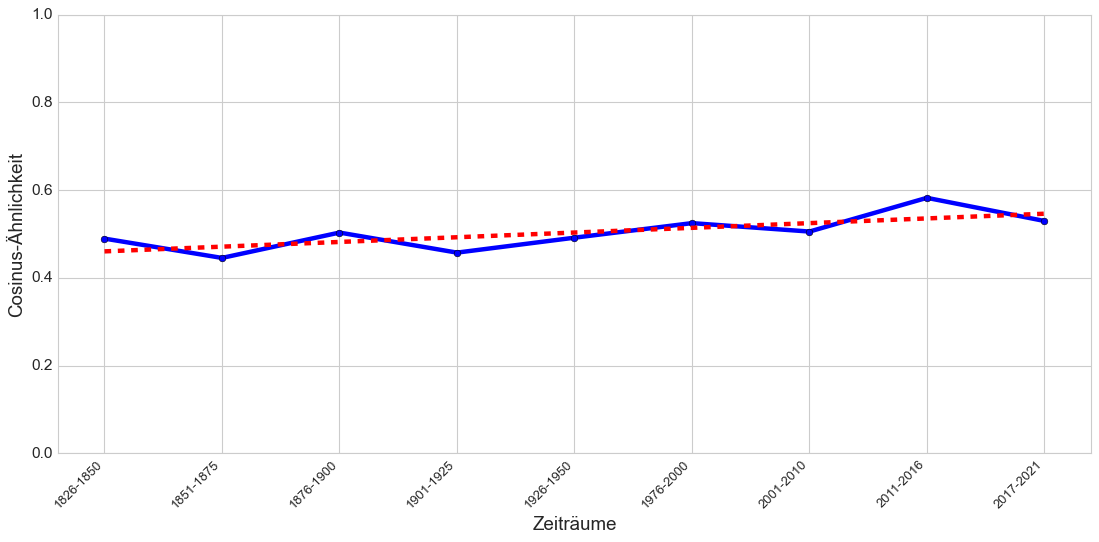

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [38]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [39]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

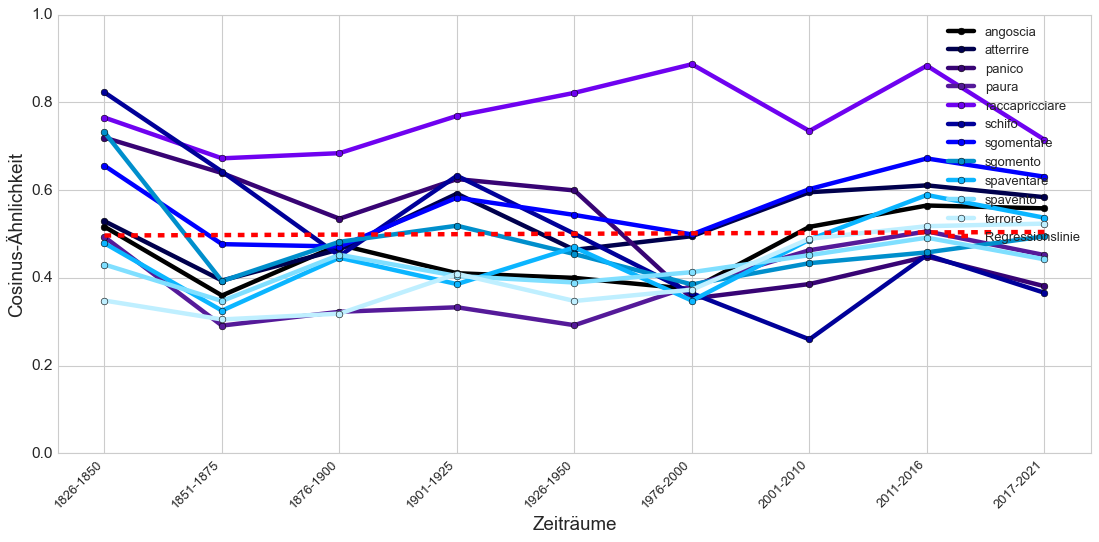

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

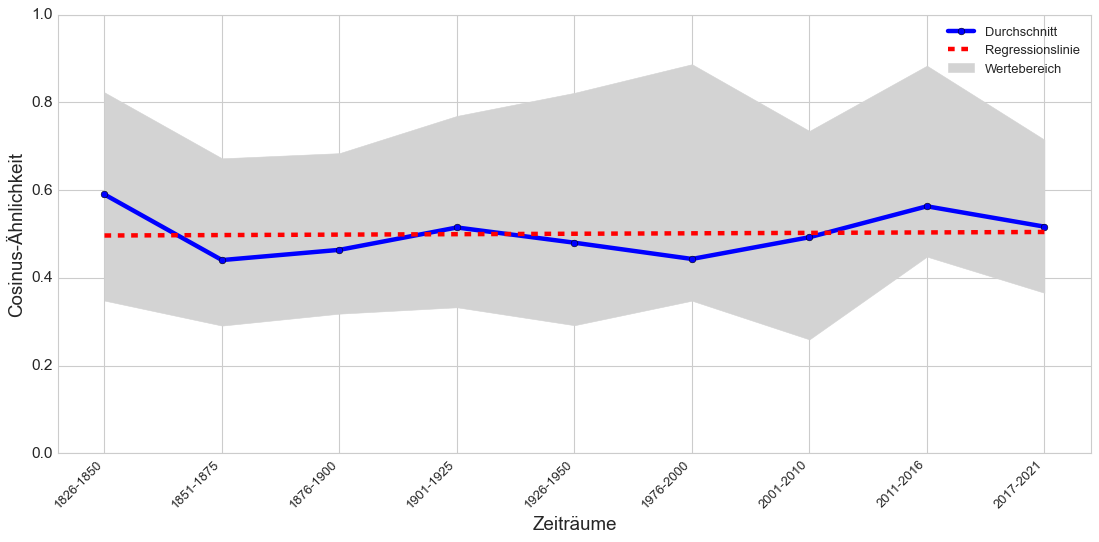

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [42]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(intessa, 0.9900182485580444)",not in vocab,"(italica, 0.9912583827972412)","(veritati, 0.9815868735313416)","(irritabile, 0.9576427340507507)","(spasmodico, 0.8766937255859375)","(significazione, 0.9488965272903442)","(lucere, 0.967526376247406)","(sèguita, 0.9918962717056274)","(dotato, 0.8471511006355286)","(spaventosamente, 0.7928876280784607)","(spaventosamente, 0.7833600044250488)","(spaventosamente, 0.816931426525116)"
1,"(deformare, 0.9894937872886658)",not in vocab,"(alzer, 0.9910526871681213)","(sperma, 0.9812334775924683)","(ripugnanze, 0.9453559517860413)","(improvvisa, 0.870053768157959)","(sensibilit, 0.9319753646850586)","(obi, 0.9673415422439575)","(interiormente, 0.9909773468971252)","(egoista, 0.8249190449714661)","(alquanto, 0.7653711438179016)","(sensuale, 0.7698838710784912)","(tremendamente, 0.7702755331993103)"
2,"(coo, 0.989368200302124)",not in vocab,"(giansenista, 0.9906277060508728)","(vei, 0.9807077646255493)","(abbietta, 0.9415181875228882)","(lacerazione, 0.8644904494285583)","(sommamente, 0.9317066073417664)","(gravido, 0.9646655321121216)","(dischiudere, 0.9905223250389099)","(agile, 0.8152478933334351)","(tremendamente, 0.751179575920105)","(incredibilmente, 0.7638717889785767)","(terribilmente, 0.7655544281005859)"
3,"(iniquamente, 0.987483561038971)",not in vocab,"(aulentissima, 0.9905818104743958)","(immacolata, 0.9804129600524902)","(incomprensibile, 0.9385731816291809)","(sanguinolento, 0.8630853295326233)","(percezione, 0.9311342239379883)","(semisferici, 0.9640932679176331)","(sublima, 0.990272045135498)","(orripilante, 0.8145138621330261)","(talmente, 0.7430550456047058)","(sospettoso, 0.7592951059341431)","(crudo, 0.7575731873512268)"
4,"(disposizion, 0.9874061942100525)",not in vocab,"(lxx, 0.9904869198799133)","(irreligiosamente, 0.9802007079124451)","(attaccamento, 0.9371367692947388)","(illanguidire, 0.8596374988555908)","(attrito, 0.9304307699203491)","(dentatura, 0.9638944864273071)","(anonimato, 0.9902552366256714)","(cliché, 0.8138465285301208)","(irritante, 0.7288230061531067)","(crudo, 0.7567983865737915)","(cinico, 0.7431210875511169)"
5,"(emuli, 0.9873292446136475)",not in vocab,"(tarpò, 0.9903109073638916)","(scarabocchio, 0.9801505208015442)","(attutire, 0.9371363520622253)","(veemente, 0.8568421602249146)","(veggono, 0.9295608997344971)","(fanciulleschi, 0.9635372161865234)","(istradato, 0.9899108409881592)","(spaventosamente, 0.8136866688728333)","(estremamente, 0.7285308837890625)","(talmente, 0.756201982498169)","(opprimente, 0.7403608560562134)"
6,"(slarg, 0.9872187972068787)",not in vocab,"(verissima, 0.990213930606842)","(regere, 0.9800580739974976)","(prono, 0.9367567896842957)","(irrefrenabile, 0.8560293316841125)","(traspirare, 0.9294507503509521)","(zazzeruta, 0.9633439183235168)","(altalena, 0.9895482063293457)","(comunicativo, 0.8062032461166382)","(ruvido, 0.7179309129714966)","(accattivante, 0.7524781823158264)","(innocuo, 0.7369323372840881)"
7,"(preservar, 0.9869863986968994)",not in vocab,"(veronesi, 0.990103542804718)","(verosimilmente, 0.9799289703369141)","(irridere, 0.9350056648254395)","(inestinguibile, 0.8552715182304382)","(originare, 0.9284060001373291)","(umor, 0.9632660150527954)","(frattaglie, 0.9893643856048584)","(arido, 0.8039425611495972)","(incredibilmente, 0.7174097895622253)","(straordinariamente, 0.7464088201522827)","(vena, 0.7336887717247009)"
8,"(accumul, 0.986886739730835)",not in vocab,"(dellasia, 0.9900603890419006)","(morfeo, 0.9797826409339905)","(diffidente, 0.9345079660415649)","(pallidezza, 0.854765772819519)","(acutezza, 0.926094651222229)","(imberbe, 0.9632490277290344)","(dimenticanza, 0.9893622398376465)","(nitido, 0.803253173828125)","(stereotipo, 0.7168995141983032)","(alquanto, 0.7463713884353638)","(incredibilmente, 0.7296884655952454)"
9,"(passeggiere, 0.9868789911270142)",not in voca

In [43]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.5197734236717224,
 '1801-1825': 0.5410279631614685,
 '1826-1850': 0.49501755833625793,
 '1851-1875': 0.6111680269241333,
 '1876-1900': 0.49234938621520996,
 '1901-1925': 0.4992797374725342,
 '1926-1950': 0.4662899971008301,
 '1951-1975': 0.5373493432998657,
 '1976-2000': 0.6035706400871277,
 '2001-2010': 0.6265361309051514,
 '2011-2016': 0.619857132434845,
 '2017-2021': 0.5791577696800232}

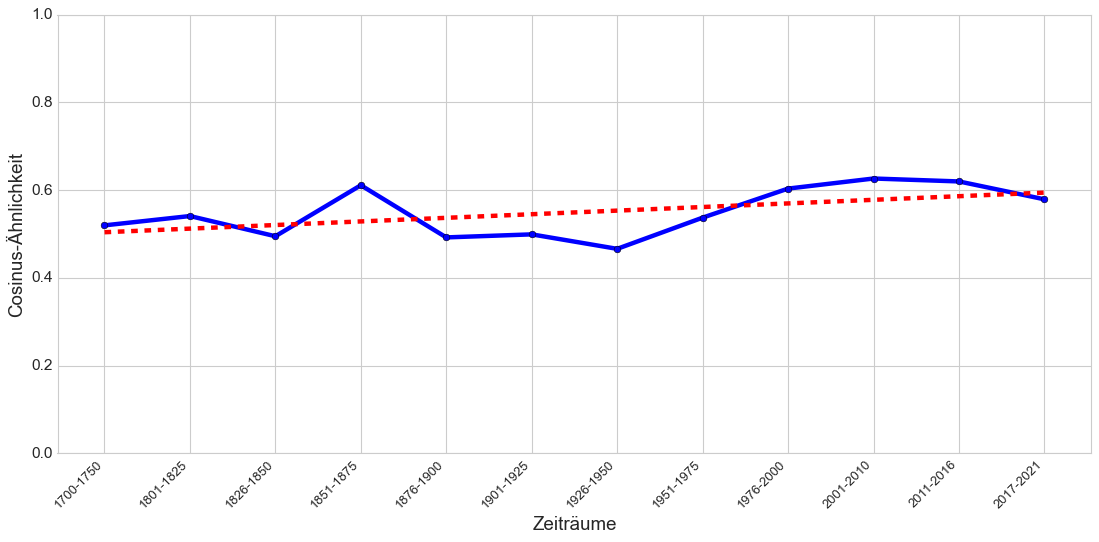

In [44]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [45]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [46]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

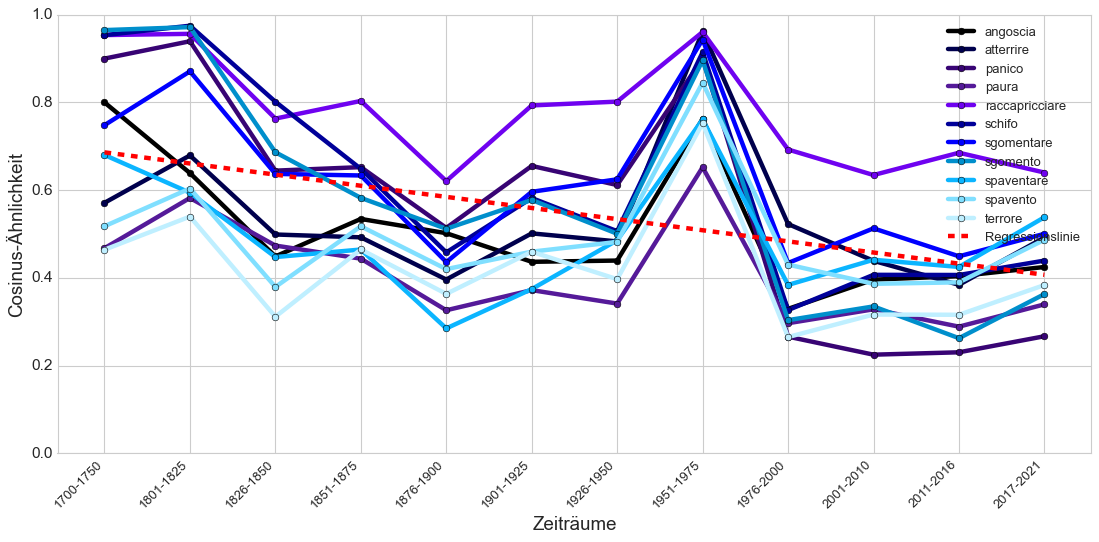

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

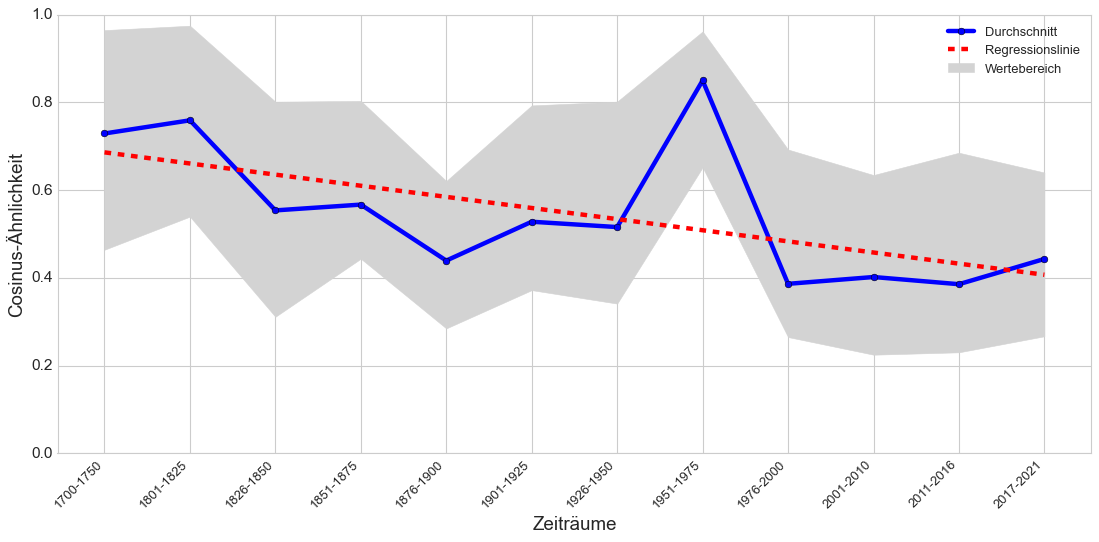

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [49]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(nugolo, 0.9896289706230164)","(sparto, 0.9743192791938782)","(inumidire, 0.9293155670166016)","(gorgogliare, 0.8356852531433105)","(ruggiva, 0.9264777302742004)","(vóto, 0.9604942202568054)","(casata, 0.9950876235961914)","(mutilare, 0.8884787559509277)","(mutilare, 0.8306558132171631)","(mutilare, 0.9025611281394958)","(orribilmente, 0.8713693618774414)"
1,not in vocab,not in vocab,"(dispiegare, 0.9833266735076904)","(lattante, 0.9722365140914917)","(pallidezza, 0.9203051328659058)","(allibire, 0.8274995684623718)","(felino, 0.9205308556556702)","(idìllio, 0.9574729204177856)","(sdegnata, 0.9948597550392151)","(orribilmente, 0.8636291027069092)","(orribilmente, 0.8264126777648926)","(orribilmente, 0.8533896803855896)","(mutilare, 0.8618515729904175)"
2,not in vocab,not in vocab,"(dardeggiare, 0.9817872643470764)","(formidato, 0.9722248315811157)","(vampa, 0.9162759780883789)","(arsura, 0.8262321352958679)","(ventre, 0.9100841283798218)","(assiderare, 0.9572738409042358)","(marchetto, 0.9947291612625122)","(sfigurato, 0.8460990786552429)","(sfigurare, 0.8086482882499695)","(sfigurato, 0.8501253128051758)","(sfigurato, 0.8446386456489563)"
3,not in vocab,not in vocab,"(spandea, 0.9816347360610962)","(lorda, 0.9720896482467651)","(ghiacciato, 0.9161814451217651)","(fantasima, 0.8219209313392639)","(spaccare, 0.9096539616584778)","(riposato, 0.9572229385375977)","(coturno, 0.9946479797363281)","(straziato, 0.8405747413635254)","(atrocemente, 0.7991728782653809)","(straziare, 0.8281605839729309)","(sfigurare, 0.8407262563705444)"
4,not in vocab,not in vocab,"(arcoli, 0.9809644818305969)","(spechi, 0.9720141887664795)","(stravolgere, 0.914126455783844)","(grondante, 0.8210195899009705)","(bestiola, 0.9016440510749817)","(avvertiva, 0.9556161761283875)","(cercine, 0.994242250919342)","(mutilato, 0.8393738269805908)","(sfigurato, 0.7907240390777588)","(sfigurare, 0.8256010413169861)","(straziato, 0.8240034580230713)"
5,not in vocab,not in vocab,"(solcare, 0.9807209372520447)","(vorago, 0.9714371562004089)","(sanguigno, 0.91380375623703)","(imporporare, 0.8209131956100464)","(stramazzare, 0.8954312205314636)","(inebbriava, 0.9545152187347412)","(macigno, 0.9940875172615051)","(sfigurati, 0.8302223682403564)","(deturpare, 0.7724334001541138)","(fanciulla, 0.8209362030029297)","(seviziare, 0.808627188205719)"
6,not in vocab,not in vocab,"(ondeggiante, 0.98024582862854)","(sparsa, 0.9706297516822815)","(gonfiare, 0.9113934636116028)","(parean, 0.8176762461662292)","(mutilare, 0.8936712741851807)","(bruciore, 0.9542083144187927)","(fanfaluche, 0.994073748588562)","(carbonizzare, 0.8096956610679626)","(deformare, 0.7598661780357361)","(seviziare, 0.8057892918586731)","(serpente, 0.798862636089325)"
7,not in vocab,not in vocab,"(strisciare, 0.9801089763641357)","(erebo, 0.9701293706893921)","(rettile, 0.9102650284767151)","(picchio, 0.8146458268165588)","(riverso, 0.8923134803771973)","(incalzanti, 0.9541200399398804)","(massone, 0.9939969182014465)","(cadavere, 0.8069968223571777)","(torturare, 0.7561956644058228)","(atterrite, 0.8035154938697815)","(straziare, 0.7979426383972168)"
8,not in vocab,not in vocab,"(irsuto, 0.9799131751060486)","(stringendolo, 0.9696411490440369)","(sfavillare, 0.9102061986923218)","(voragine, 0.8142356872558594)","(fradicio, 0.8890225291252136)","(fidente, 0.9540141224861145)","(ghiacciato, 0.9939730167388916)","(ustionato, 0.7853659987449646)","(straziato, 0.7524721026420593)","(trucidare, 0.8001925945281982)","(giacere, 0.7924784421920776)"
9,not in vocab,not in vocab,"(invìa, 0.979429304599762)","(incrocicchiando, 0.9692835211753845)","(abbarbagliare, 0.9099820852279663)","(scheggia, 0.8134772777557373)","(schiacciato, 0.8886232376098633)","(agitarti, 0.9533808827400208)","(nibelheim, 0.9938821196556091)","(rinvenire, 0.7830110788345337)","(sfigurat

In [50]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1801-1825': 0.5566169023513794,
 '1826-1850': 0.41307348012924194,
 '1851-1875': 0.4623044729232788,
 '1876-1900': 0.3983173370361328,
 '1901-1925': 0.3856763243675232,
 '1926-1950': 0.44405892491340637,
 '1951-1975': 0.4762972891330719,
 '1976-2000': 0.2627835273742676,
 '2001-2010': 0.30433058738708496,
 '2011-2016': 0.32926106452941895,
 '2017-2021': 0.30662354826927185}

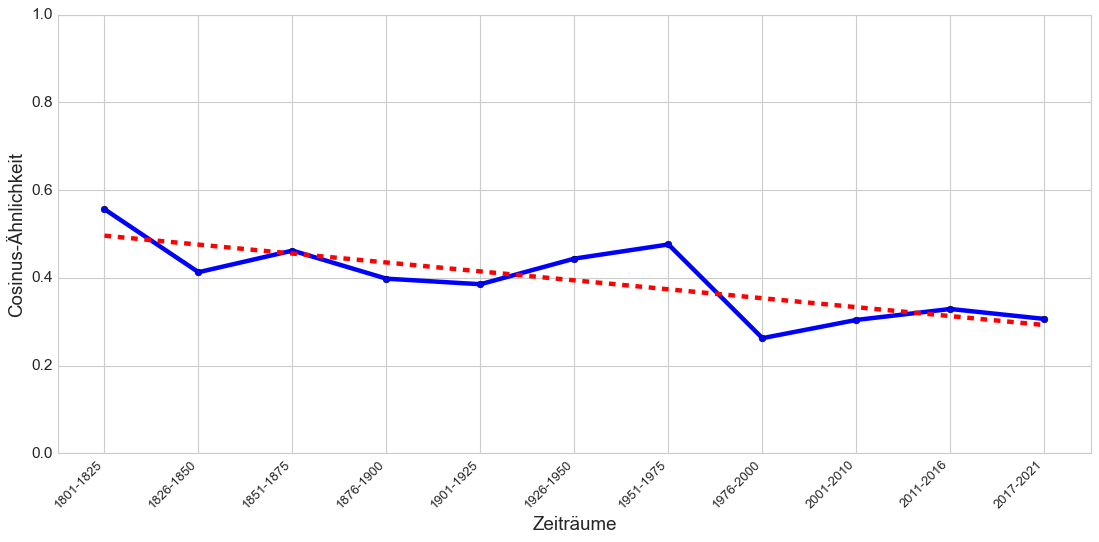

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [52]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [53]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

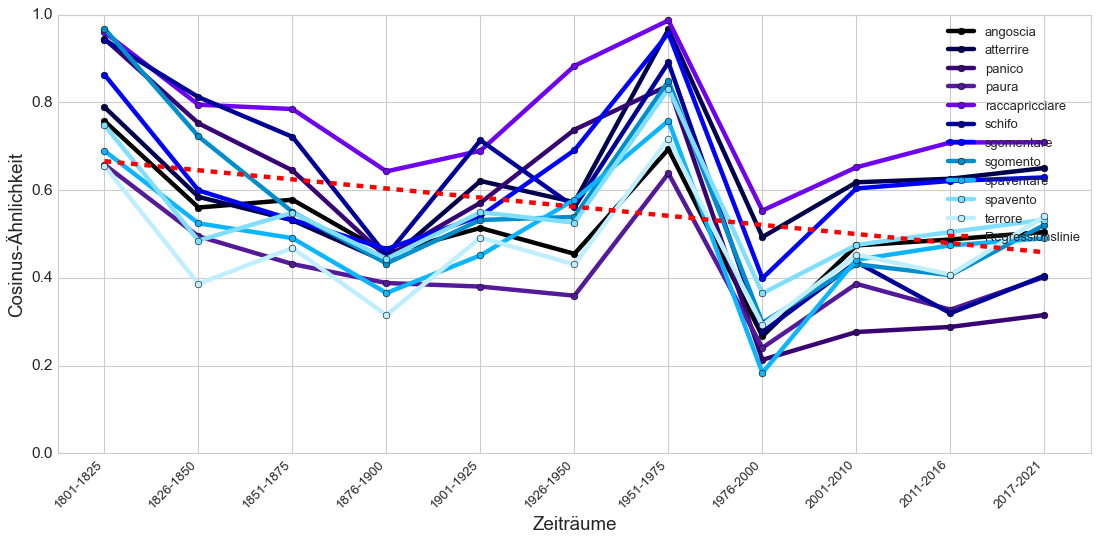

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

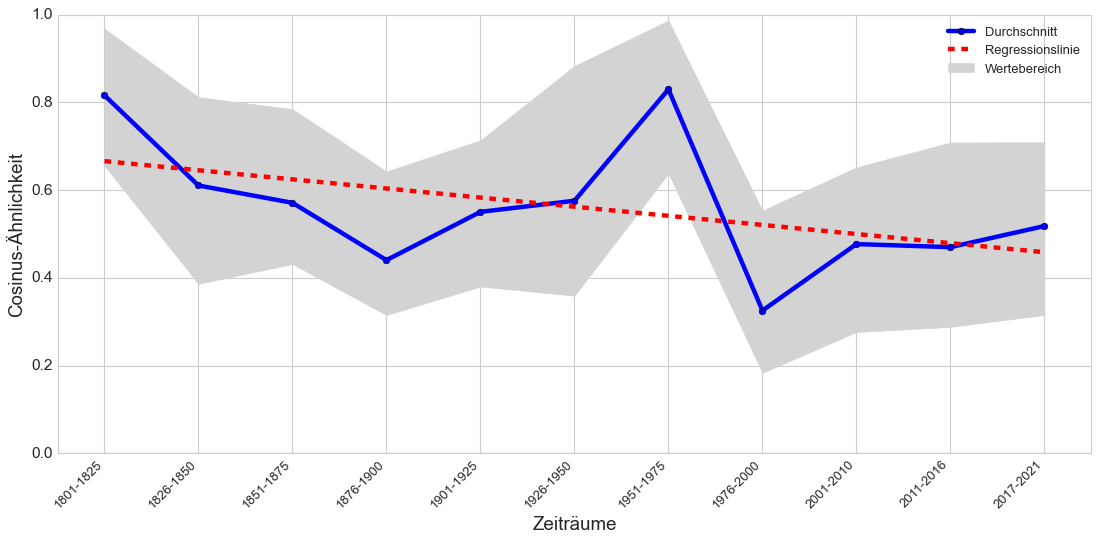

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [56]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(sommergere, 0.9722576141357422)","(lacero, 0.964974582195282)","(fremito, 0.9660810232162476)","(traversare, 0.9113234281539917)","(orrendamente, 0.8499047160148621)","(spaventosamente, 0.6470547914505005)","(orrendamente, 0.746730625629425)","(spaventosamente, 0.8573630452156067)","(bruciato, 0.9856637716293335)","(orrendamente, 0.8636291027069092)","(orrendamente, 0.8264126777648926)","(orrendamente, 0.8533896207809448)","(orrendamente, 0.8713693022727966)"
1,"(urtar, 0.9704509377479553)","(squallido, 0.9636502265930176)","(scaldare, 0.963637113571167)","(rimbombo, 0.910716712474823)","(ghiacciato, 0.8478494882583618)","(sordamente, 0.6424952745437622)","(terribilmente, 0.7415031790733337)","(osso, 0.8522216081619263)","(agguantare, 0.9849094748497009)","(sfigurato, 0.8542082905769348)","(atrocemente, 0.7790821194648743)","(mutilare, 0.8027315139770508)","(atrocemente, 0.8071082830429077)"
2,"(aquilonar, 0.9697620272636414)","(salma, 0.9631534814834595)","(pensoso, 0.9626970291137695)","(veloce, 0.9095224142074585)","(rantolo, 0.8464528322219849)","(corpicino, 0.6337457895278931)","(sanguinare, 0.7233489155769348)","(impallidire, 0.843592643737793)","(graffiare, 0.9842797517776489)","(mutilare, 0.8530481457710266)","(mutilare, 0.7545220255851746)","(sfigurato, 0.7945855855941772)","(sfigurato, 0.8038105964660645)"
3,"(aquilon, 0.9666347503662109)","(atra, 0.9630856513977051)","(bagnare, 0.9612292051315308)","(neve, 0.9056158065795898)","(pallore, 0.8416045904159546)","(mutilare, 0.6336033344268799)","(palpebra, 0.7219266891479492)","(madlen, 0.8340325951576233)","(curvare, 0.9833649396896362)","(straziato, 0.8371615409851074)","(sfigurare, 0.7414400577545166)","(atrocemente, 0.7735427618026733)","(mutilare, 0.802436351776123)"
4,"(frementi, 0.9660024046897888)","(rivi, 0.9620306491851807)","(infernale, 0.9595538377761841)","(schiena, 0.9038517475128174)","(tremito, 0.8357201814651489)","(arteria, 0.6317238807678223)","(ruggiva, 0.721088171005249)","(gracile, 0.8312419056892395)","(sdraiato, 0.9833460450172424)","(mutilato, 0.8095312118530273)","(sfigurato, 0.7329210638999939)","(fanciulla, 0.7693594694137573)","(sfigurare, 0.7934910655021667)"
5,"(inferna, 0.96567302942276)","(inseguire, 0.9614127278327942)","(primiero, 0.9591052532196045)","(torrente, 0.9035743474960327)","(convulsione, 0.8350690603256226)","(orrendamente, 0.6201037764549255)","(coscia, 0.7151576280593872)","(tragicamente, 0.8273370862007141)","(dosso, 0.9828940629959106)","(ustionato, 0.8032563328742981)","(deturpare, 0.7220137119293213)","(livido, 0.745173454284668)","(seviziare, 0.7839886546134949)"
6,"(empié, 0.9653398990631104)","(pregni, 0.9611043930053711)","(mesti, 0.958695650100708)","(siepe, 0.9006494283676147)","(pallidezza, 0.8346601724624634)","(ringhiare, 0.6187168955802917)","(piaga, 0.7144566774368286)","(pallore, 0.8271205425262451)","(tozzo, 0.982809841632843)","(straziare, 0.7980126738548279)","(deformare, 0.7177006602287292)","(straziare, 0.7440957427024841)","(straziato, 0.7748266458511353)"
7,"(fischiare, 0.9644474387168884)","(fuggitivo, 0.959808349609375)","(scoppiare, 0.9580431580543518)","(fragore, 0.8999987840652466)","(gonfiare, 0.8331854343414307)","(paralitico, 0.6142656207084656)","(stomaco, 0.7045257091522217)","(malvagio, 0.8261294364929199)","(pera, 0.982761561870575)","(sfigurati, 0.7955432534217834)","(spaventosamente, 0.7143386602401733)","(macabro, 0.7440173029899597)","(giacere, 0.7597867250442505)"
8,"(lambire, 0.9637011885643005)","(semivivo, 0.9595024585723877)","(palpebra, 0.9577583074569702)","(uccello, 0.8998616933822632)","(contrazione, 0.8319107294082642)","(ansima, 0.6127482652664185)","(dente, 0.7027162909507751)","(accarezzare, 0.8236246109008789)","(agonizzare, 0.9821785688400269)","(maniaco, 0.7847558259963989)","(puzzolente, 0.7130554914474487)","(oltraggiare, 0.7432565093

In [57]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.3867932856082916,
 '1751-1800': 0.4084637463092804,
 '1801-1825': 0.5392969250679016,
 '1826-1850': 0.3555257022380829,
 '1851-1875': 0.4206642508506775,
 '1876-1900': 0.40943360328674316,
 '1901-1925': 0.3535546660423279,
 '1926-1950': 0.42540183663368225,
 '1951-1975': 0.4384174346923828,
 '1976-2000': 0.3349014222621918,
 '2001-2010': 0.353154718875885,
 '2011-2016': 0.3528311848640442,
 '2017-2021': 0.3466353714466095}

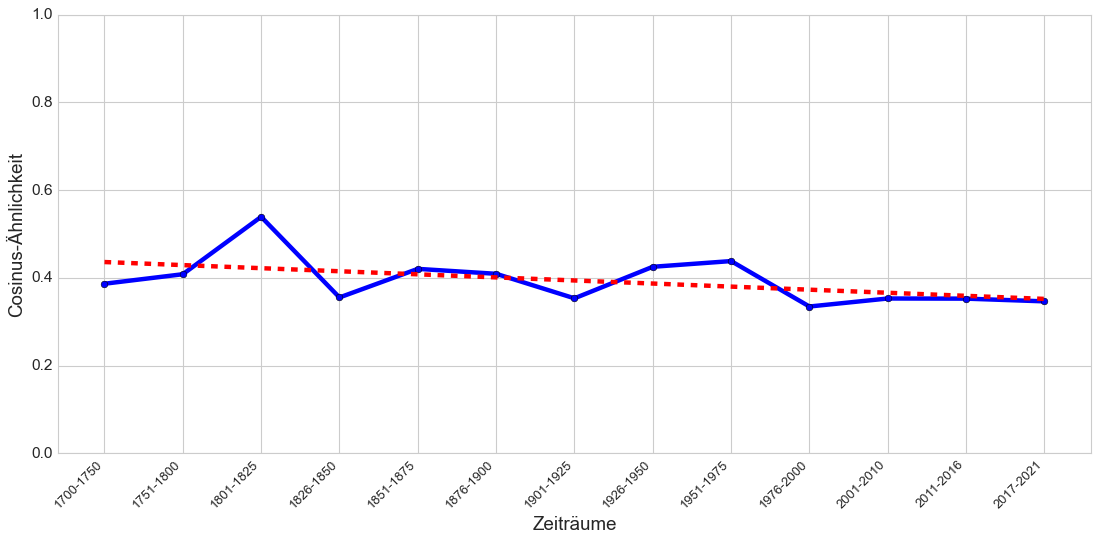

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [59]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [60]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

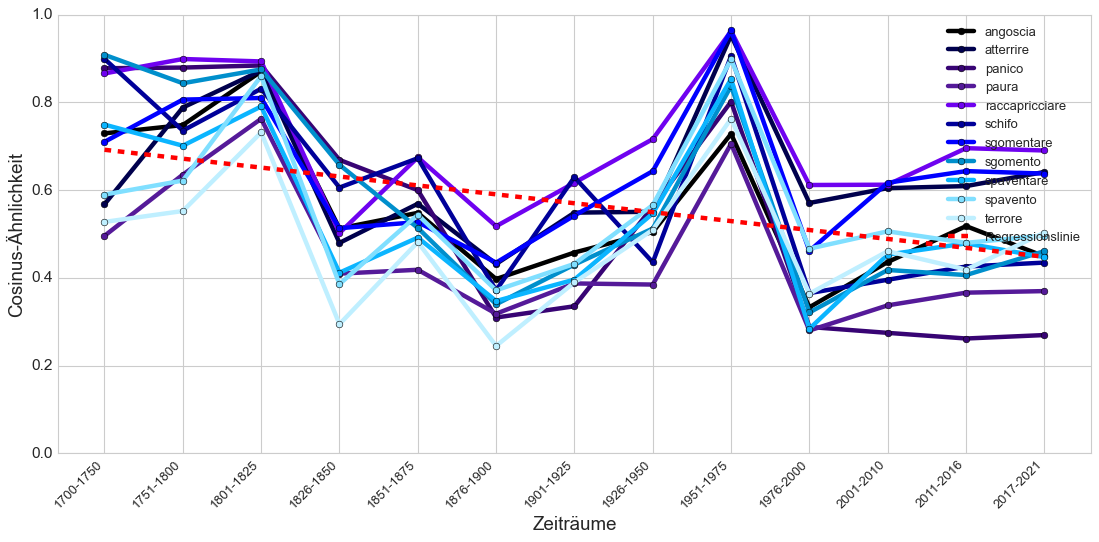

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

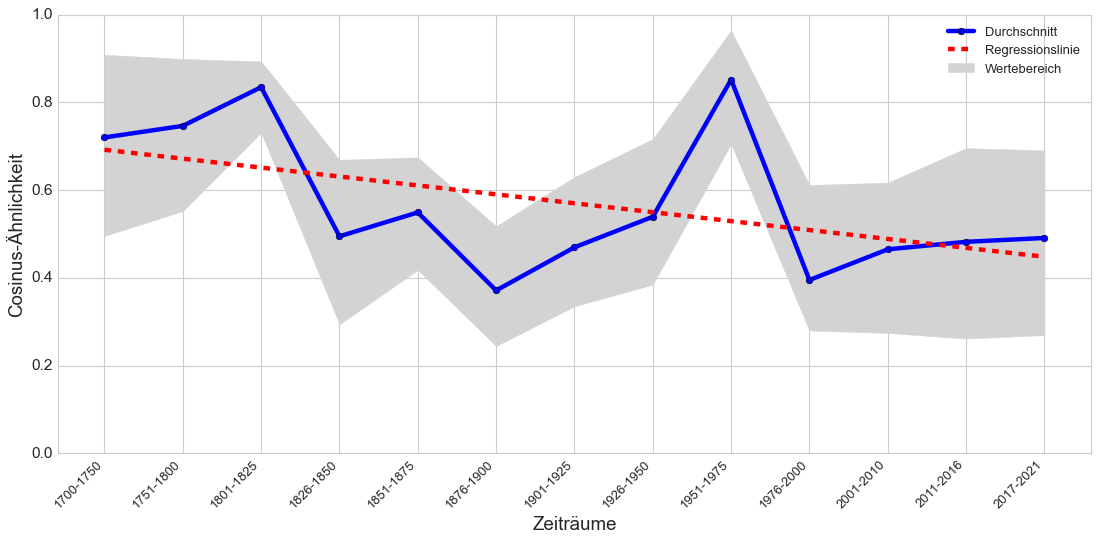

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [63]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(nicomedia, 0.9726629853248596)",not in vocab,"(granito, 0.9939626455307007)","(darme, 0.9875007271766663)","(baldanzoso, 0.9065506458282471)","(fiaccare, 0.8094431161880493)","(ruggiva, 0.860338568687439)","(pallore, 0.9066553115844727)","(denutrito, 0.9435995221138)","(mostruosamente, 0.813686728477478)","(mostruosamente, 0.7928875684738159)","(mostruosamente, 0.7833600044250488)","(mostruosamente, 0.816931426525116)"
1,"(plenilunio, 0.970717191696167)",not in vocab,"(slanciare, 0.9934224486351013)","(provvisto, 0.9868828058242798)","(imperversare, 0.9060428738594055)","(veemente, 0.806155264377594)","(anelante, 0.8428675532341003)","(gota, 0.9056677222251892)","(sperduto, 0.9367557168006897)","(insignificante, 0.7911855578422546)","(tremendamente, 0.729724645614624)","(pungente, 0.7447102069854736)","(incredibilmente, 0.7440820932388306)"
2,"(compresovi, 0.9680728316307068)",not in vocab,"(guatò, 0.9924806952476501)","(blasone, 0.9862284064292908)","(fioccare, 0.8959522843360901)","(mostruosamente, 0.805284321308136)","(artiglio, 0.833520233631134)","(estatico, 0.902256965637207)","(avea, 0.9363417029380798)","(arido, 0.7856123447418213)","(orribilmente, 0.7143385410308838)","(talmente, 0.7370557188987732)","(talmente, 0.7420632243156433)"
3,"(adí, 0.9678974747657776)",not in vocab,"(contusione, 0.9923791289329529)","(beffato, 0.9859892129898071)","(scompigliare, 0.8959454894065857)","(parossismo, 0.803005576133728)","(sussulto, 0.8309385776519775)","(sbarrato, 0.9007092118263245)","(omone, 0.9333576560020447)","(infinitamente, 0.7841058969497681)","(terribilmente, 0.7116670608520508)","(magro, 0.7289016842842102)","(terribilmente, 0.7342658042907715)"
4,"(goletta, 0.96748948097229)",not in vocab,"(unoil, 0.9919595122337341)","(gallone, 0.9858416318893433)","(moschetteria, 0.8925408124923706)","(compresso, 0.798479437828064)","(ruggito, 0.8304845690727234)","(contrarre, 0.9002367854118347)","(compianto, 0.9330391883850098)","(impervio, 0.7821797132492065)","(dilatare, 0.6728308200836182)","(irrimediabilmente, 0.7260546088218689)","(tremendamente, 0.7230121493339539)"
5,"(pestilenza, 0.966955304145813)",not in vocab,"(casolari, 0.9919469356536865)","(anglica, 0.9855965971946716)","(mitraglia, 0.8913704752922058)","(spasmodico, 0.7948014140129089)","(livido, 0.8287409543991089)","(carezzare, 0.8948470950126648)","(scheletro, 0.9325355887413025)","(degradare, 0.7755388617515564)","(magro, 0.6695985198020935)","(oscurità, 0.7223942279815674)","(opprimente, 0.7215930819511414)"
6,"(espiazione, 0.966640055179596)",not in vocab,"(divelta, 0.9919125437736511)","(armeggio, 0.985106348991394)","(infuriare, 0.8909950852394104)","(muscolo, 0.7893804907798767)","(agghiacciare, 0.8211672902107239)","(semiaperto, 0.8922396302223206)","(impacciato, 0.9323384761810303)","(solare, 0.7749953269958496)","(invisibile, 0.6622806787490845)","(impermeabile, 0.7185289263725281)","(ripetitivo, 0.7044152021408081)"
7,"(voleaal, 0.9659619927406311)",not in vocab,"(ombrello, 0.9918557405471802)","(stame, 0.9850713610649109)","(gragnuola, 0.8905620574951172)","(vertiginoso, 0.7882834672927856)","(pugna, 0.8158845901489258)","(inarcare, 0.8909852504730225)","(omosessuale, 0.9316503405570984)","(disgraziato, 0.7704501748085022)","(irreale, 0.6611210107803345)","(fluido, 0.7178101539611816)","(innocuo, 0.7039046287536621)"
8,"(spunt, 0.9655764102935791)",not in vocab,"(sbito, 0.9918231964111328)","(scorrente, 0.984665036201477)","(sfolgorare, 0.8885988593101501)","(irrefrenabile, 0.7867422699928284)","(tremito, 0.8158551454544067)","(felino, 0.8907678127288818)","(poveramente, 0.9313885569572449)","(agile, 0.7696757316589355)","(alieno, 0.6601289510726929)","(crudo, 0.7175387740135193)","(finzione, 0.7018275260925293)"
9,"(ressurrezione, 0.964255690574646)",not in vocab,"(hebal, 0.9917871356010437)","(tracannato, 0.984607696

In [64]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.5063210129737854,
 '1801-1825': 0.5256286263465881,
 '1826-1850': 0.47794681787490845,
 '1851-1875': 0.46562209725379944,
 '1876-1900': 0.4666493237018585,
 '1901-1925': 0.40402093529701233,
 '1926-1950': 0.39743268489837646,
 '1951-1975': 0.5507341623306274,
 '1976-2000': 0.6007910370826721,
 '2001-2010': 0.5146411061286926,
 '2011-2016': 0.5312654376029968,
 '2017-2021': 0.5605974793434143}

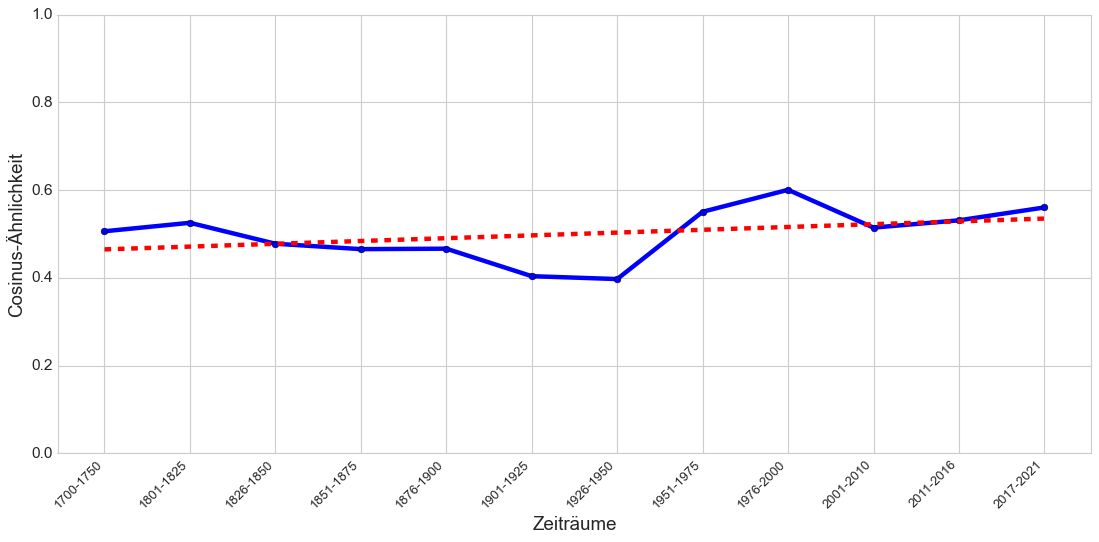

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [66]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [67]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

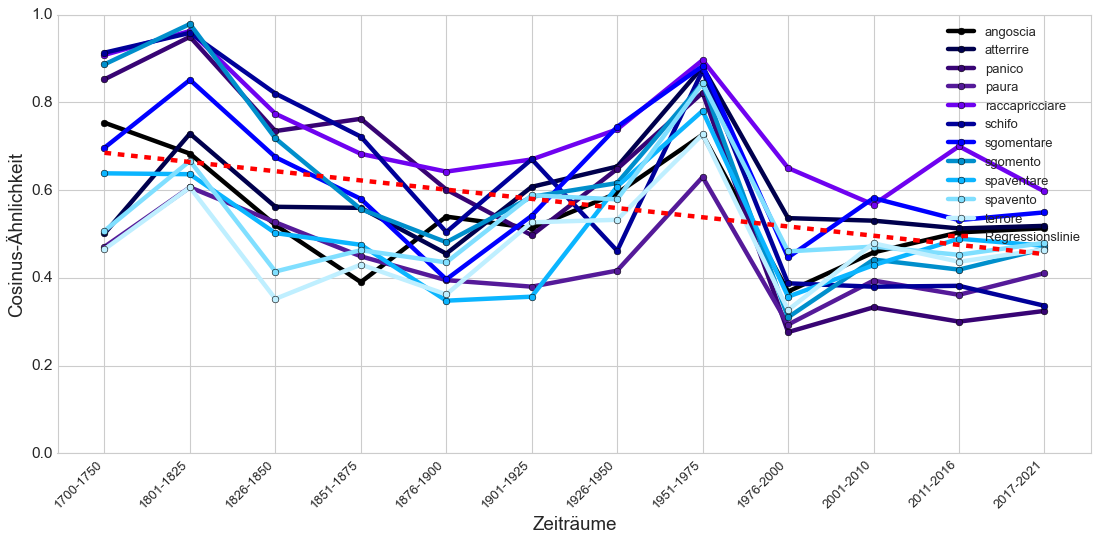

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

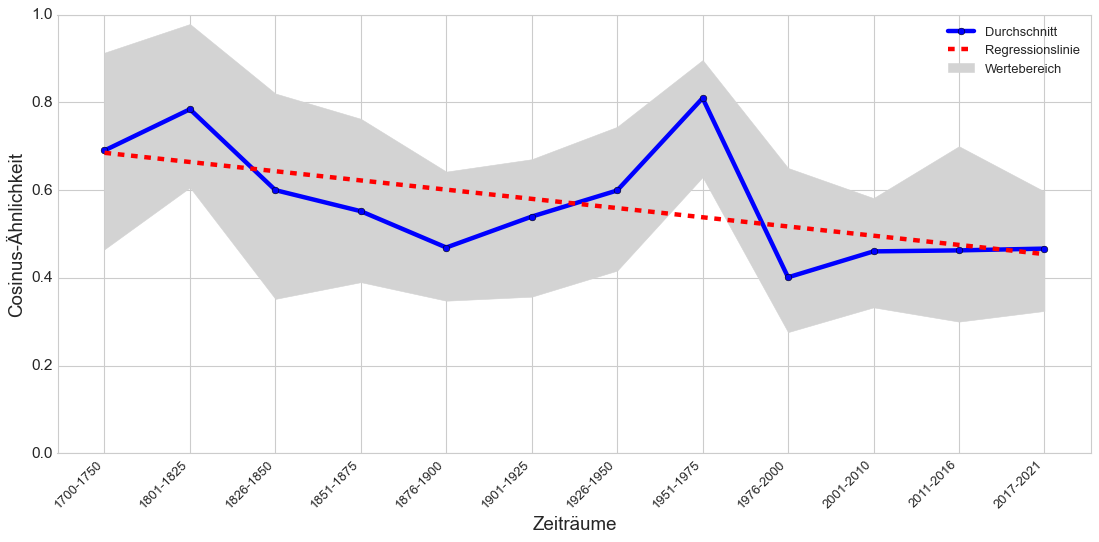

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [70]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(frascati, 0.9803973436355591)","(arsindo, 0.9440447688102722)","(torpore, 0.9768396019935608)","(percossa, 0.9354419112205505)","(sentivasi, 0.8482292294502258)","(tremendamente, 0.69870525598526)","(atroce, 0.7944974303245544)","(gelosia, 0.8593886494636536)","(commuovere, 0.9434760212898254)","(tremendamente, 0.8512153029441833)","(tremendamente, 0.8830317258834839)","(tremendamente, 0.852142870426178)","(tremendamente, 0.8666373491287231)"
1,"(chiaia, 0.9797802567481995)","(ingannò, 0.9420046806335449)","(impenetrabile, 0.9731379747390747)","(assalitore, 0.9307389855384827)","(assalse, 0.8394141793251038)","(spettro, 0.6829668283462524)","(torturare, 0.7802731394767761)","(incomposto, 0.8307515382766724)","(eccitare, 0.9382031559944153)","(estremamente, 0.6688036918640137)","(spaventosamente, 0.7116671800613403)","(spaventosamente, 0.681507408618927)","(mostruosamente, 0.7655543088912964)"
2,"(ronco, 0.9795772433280945)","(accortosi, 0.9418814778327942)","(rimedj, 0.9720106720924377)","(bastone, 0.9287076592445374)","(dolorosamente, 0.8388984799385071)","(impassibile, 0.6821165084838867)","(insopportabile, 0.7795032858848572)","(crudele, 0.8103845715522766)","(patire, 0.9357224702835083)","(talmente, 0.639686644077301)","(mostruosamente, 0.6935962438583374)","(mostruosamente, 0.6650594472885132)","(spaventosamente, 0.7342658638954163)"
3,"(garda, 0.979474663734436)","(ambasciadore, 0.9416429996490479)","(combattuta, 0.9714727401733398)","(stocco, 0.927634060382843)","(stravolgere, 0.8386428952217102)","(insensibile, 0.6730753779411316)","(patito, 0.7722981572151184)","(passacantando, 0.7999019026756287)","(agio, 0.9351068735122681)","(faccenda, 0.6273036003112793)","(orribilmente, 0.6179686188697815)","(talmente, 0.6641826629638672)","(angosciare, 0.7086398601531982)"
4,"(teramo, 0.9793071746826172)","(messaggero, 0.9412028789520264)","(assopire, 0.9707976579666138)","(esplosione, 0.9267690181732178)","(avvampare, 0.8383046388626099)","(sanguinoso, 0.6683449149131775)","(cagion, 0.7712501287460327)","(orribilmente, 0.7996152639389038)","(verit, 0.9342942237854004)","(particolarmente, 0.6257553100585938)","(profondamente, 0.5902437567710876)","(estremamente, 0.6391401290893555)","(affatto, 0.6942944526672363)"
5,"(traboccanti, 0.9792784452438354)","(congiurati, 0.9409789443016052)","(colorire, 0.970488965511322)","(serrato, 0.9257405400276184)","(istupidire, 0.8343685865402222)","(sanguinolento, 0.6638200283050537)","(spaventoso, 0.7674630880355835)","(malvagio, 0.7965986728668213)","(vergognare, 0.9336057901382446)","(goffo, 0.6057960391044617)","(atrocemente, 0.5890656113624573)","(noioso, 0.6327800750732422)","(cinico, 0.6931273937225342)"
6,"(granatello, 0.9791133999824524)","(adone, 0.940355122089386)","(pietosamente, 0.9704082012176514)","(piega, 0.9243319630622864)","(turbato, 0.8342519402503967)","(pallidezza, 0.6603521704673767)","(martoriare, 0.7665809988975525)","(vizio, 0.7959608435630798)","(neppur, 0.9334108829498291)","(spaventosamente, 0.5959931015968323)","(angosciare, 0.5849193930625916)","(orribilmente, 0.6303406953811646)","(assai, 0.6906699538230896)"
7,"(cassino, 0.9790956377983093)","(coprir, 0.939927875995636)","(tollerarli, 0.9701144695281982)","(ugne, 0.9225223064422607)","(lievemente, 0.8310827612876892)","(truce, 0.6577128767967224)","(simulare, 0.7651766538619995)","(creatura, 0.7954674363136292)","(risorgere, 0.9330121874809265)","(tecnicamente, 0.5958471298217773)","(angosciante, 0.579365074634552)","(abbastanza, 0.6302885413169861)","(apparentemente, 0.6870062351226807)"
8,"(attendarono, 0.9779581427574158)","(diceasi, 0.9398179054260254)","(tristizia, 0.9701051712036133)","(pistola, 0.9223785996437073)","(svenire, 0.8295451402664185)","(oppresso, 0.6576770544052124)","(offuscare, 0.76441490650177)","(presentimento, 0.7899125218391418)","(destare, 0.93237507343

In [71]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.4698086380958557,
 '1751-1800': 0.5238760113716125,
 '1801-1825': 0.6266420483589172,
 '1826-1850': 0.43938249349594116,
 '1851-1875': 0.5077981352806091,
 '1876-1900': 0.41160255670547485,
 '1901-1925': 0.5187955498695374,
 '1926-1950': 0.48254919052124023,
 '1951-1975': 0.5898380279541016,
 '1976-2000': 0.5468953847885132,
 '2001-2010': 0.4311830401420593,
 '2011-2016': 0.4544345438480377,
 '2017-2021': 0.5544235706329346}

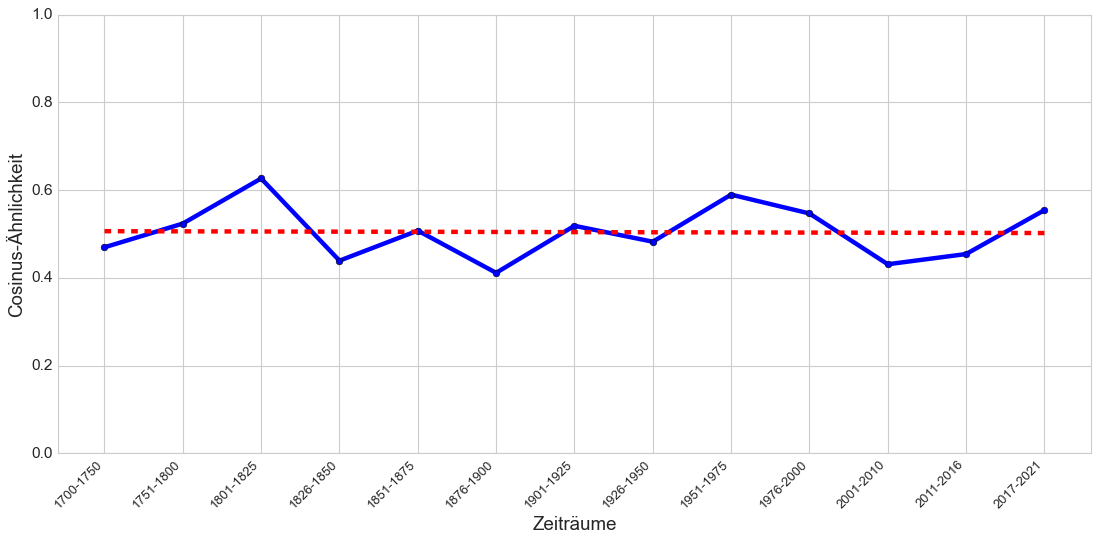

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [73]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [74]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

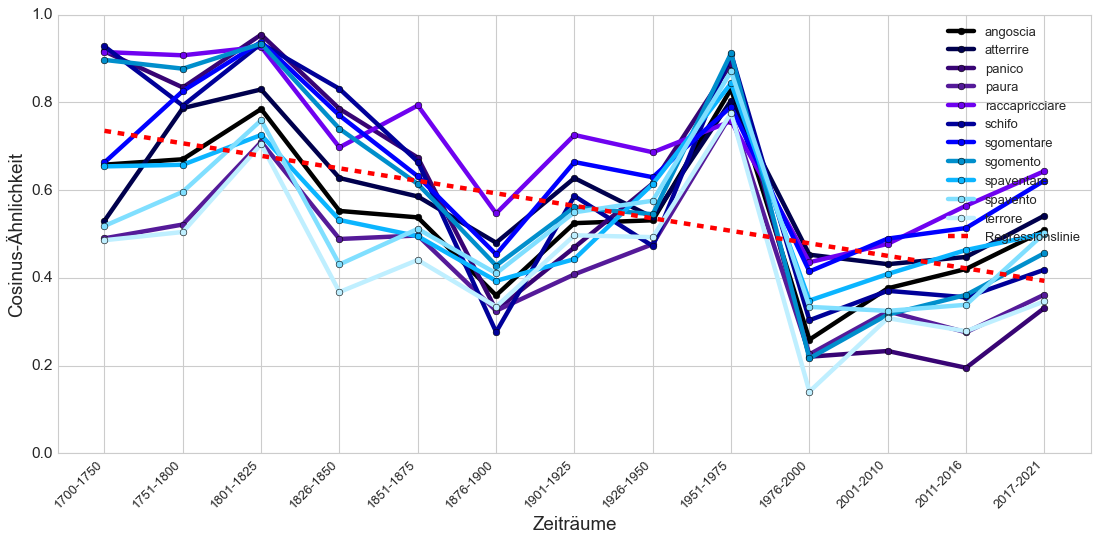

In [75]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

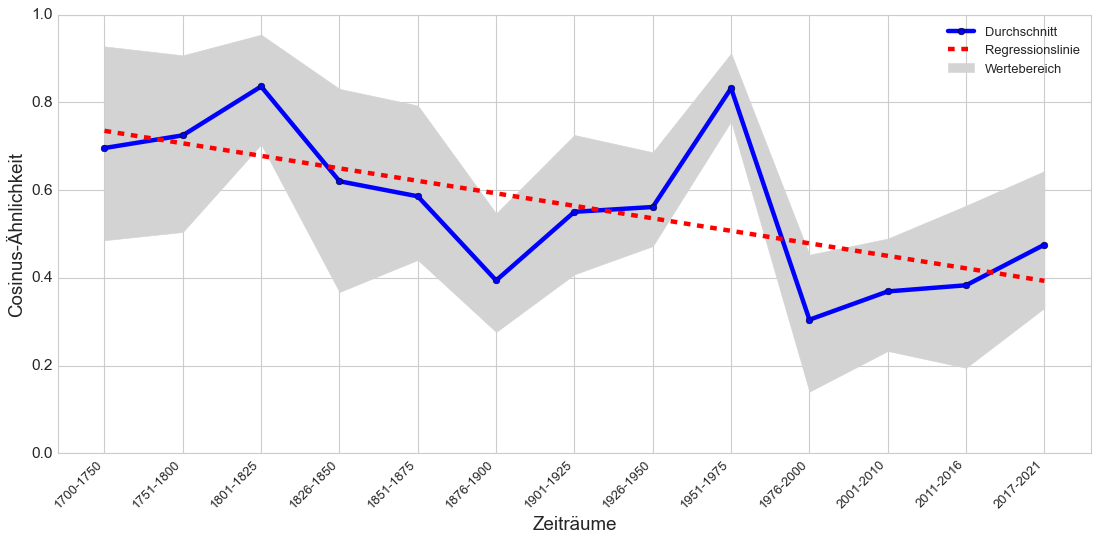

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [77]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(trescar, 0.9938362240791321)","(congiunte, 0.9824568629264832)","(trafiggere, 0.8948813676834106)","(comprimere, 0.8549750447273254)","(gastigata, 0.948865532875061)","(inspiegabile, 0.9446378350257874)","(mélange, 0.9913895726203918)","(terribilmente, 0.8512152433395386)","(terribilmente, 0.8830317258834839)","(terribilmente, 0.8521431088447571)","(terribilmente, 0.8666374087333679)"
1,not in vocab,not in vocab,"(gelsomino, 0.9936640858650208)","(oltrech, 0.9823927283287048)","(ghiacciato, 0.8787557482719421)","(spasmodico, 0.8500138521194458)","(scusabile, 0.942531406879425)","(inquietitudine, 0.9439584016799927)","(strumentatore, 0.9907705187797546)","(spaventosamente, 0.7170532941818237)","(mostruosamente, 0.7511796951293945)","(mostruosamente, 0.6875264048576355)","(mostruosamente, 0.7702755331993103)"
2,not in vocab,not in vocab,"(carte, 0.9935593605041504)","(soggettati, 0.981607973575592)","(delirante, 0.8785534501075745)","(delirii, 0.8495423793792725)","(allontanamento, 0.9383217692375183)","(follìa, 0.9426589012145996)","(antiautoritaria, 0.9906350374221802)","(estremamente, 0.7115858793258667)","(spaventosamente, 0.7297247052192688)","(abbastanza, 0.6852655410766602)","(spaventosamente, 0.7230120897293091)"
3,not in vocab,not in vocab,"(avviossi, 0.9935192465782166)","(rimaser, 0.9811911582946777)","(contorcere, 0.8773415684700012)","(ambascia, 0.8492956757545471)","(affliggerlo, 0.937095046043396)","(pànico, 0.9423435926437378)","(federalismo, 0.9905932545661926)","(faccenda, 0.7021119594573975)","(alquanto, 0.653913140296936)","(estremamente, 0.6847103238105774)","(cinico, 0.6893806457519531)"
4,not in vocab,not in vocab,"(fuggiro, 0.9933674335479736)","(buridan, 0.9809228777885437)","(stravolgere, 0.8772485852241516)","(annientare, 0.8448916673660278)","(fedelt, 0.9364001154899597)","(esasperare, 0.941321074962616)","(statalista, 0.9903317093849182)","(mostruosamente, 0.6927125453948975)","(talmente, 0.6445646286010742)","(spaventosamente, 0.6536297798156738)","(assai, 0.688069760799408)"
5,not in vocab,not in vocab,"(langlia, 0.9931597113609314)","(inesplicabil, 0.9805463552474976)","(rantolo, 0.873809814453125)","(combattuto, 0.844325840473175)","(imposizione, 0.9347594380378723)","(stravolgere, 0.9408581256866455)","(dispotismo, 0.989973783493042)","(tecnicamente, 0.6865670680999756)","(orribilmente, 0.6374204754829407)","(talmente, 0.6461936831474304)","(apparentemente, 0.6794440746307373)"
6,not in vocab,not in vocab,"(belato, 0.9929980635643005)","(introito, 0.9804039597511292)","(pulsazione, 0.8733724355697632)","(sdegnoso, 0.8409036993980408)","(carpire, 0.9336468577384949)","(confessandosi, 0.9392294883728027)","(avallare, 0.9899526238441467)","(noioso, 0.6769777536392212)","(profondamente, 0.6206963658332825)","(incredibilmente, 0.6453098058700562)","(talmente, 0.6683024168014526)"
7,not in vocab,not in vocab,"(insultar, 0.9928767681121826)","(sacrate, 0.9802277088165283)","(agghiacciare, 0.8706651926040649)","(inasprire, 0.8401126861572266)","(furberia, 0.9330044984817505)","(irrefrenabile, 0.9388378262519836)","(avversaria, 0.989711582660675)","(spavaldo, 0.6751447319984436)","(estremamente, 0.6165704131126404)","(noioso, 0.6412771940231323)","(ripetitivo, 0.6663802266120911)"
8,not in vocab,not in vocab,"(recisi, 0.9927481412887573)","(amabilmente, 0.9800608158111572)","(anelito, 0.8697121739387512)","(impressionabile, 0.8376930356025696)","(avvalersi, 0.932416558265686)","(angosce, 0.9369960427284241)","(marxisti, 0.989672064781189)","(talmente, 0.6727537512779236)","(patetico, 0.6101476550102234)","(alquanto, 0.6344541907310486)","(estremamente, 0.6624569892883301)"
9,not in vocab,not in vocab,"(scuotono, 0.9927374720573425)","(boreal, 0.9799599051475525)","(comprimere, 0.8667703866958618)","(intollerabile, 0.8374612927436829)","(deferenza

In [78]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.49671417474746704,
 '1826-1850': 0.5330477952957153,
 '1851-1875': 0.4801815152168274,
 '1876-1900': 0.4981200397014618,
 '1901-1925': 0.518204927444458,
 '1926-1950': 0.48801755905151367,
 '1951-1975': 0.5443938970565796,
 '1976-2000': 0.6062824726104736,
 '2001-2010': 0.4980562925338745,
 '2011-2016': 0.5339215397834778,
 '2017-2021': 0.5421997308731079}

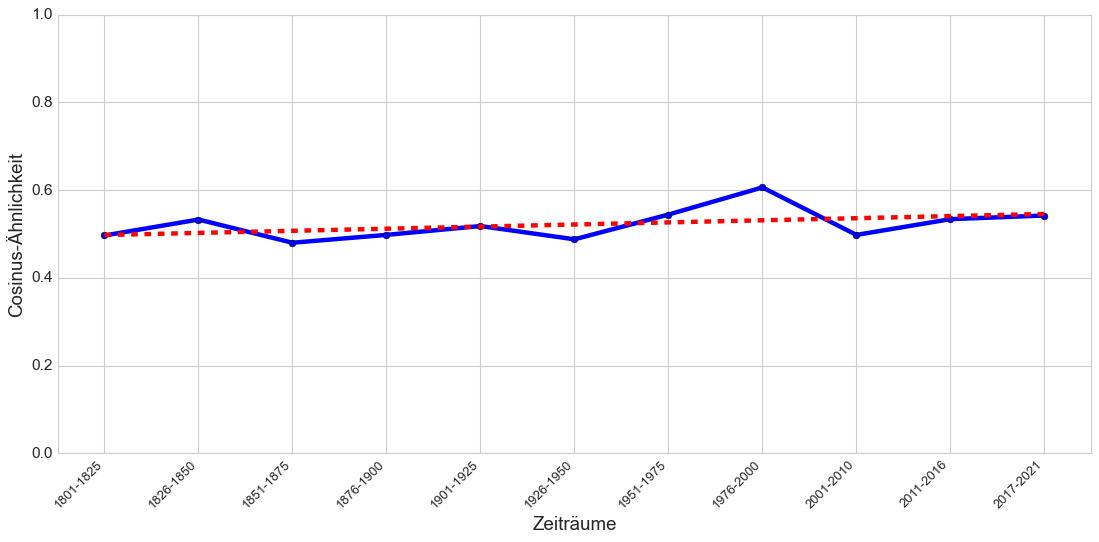

In [79]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [80]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [81]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

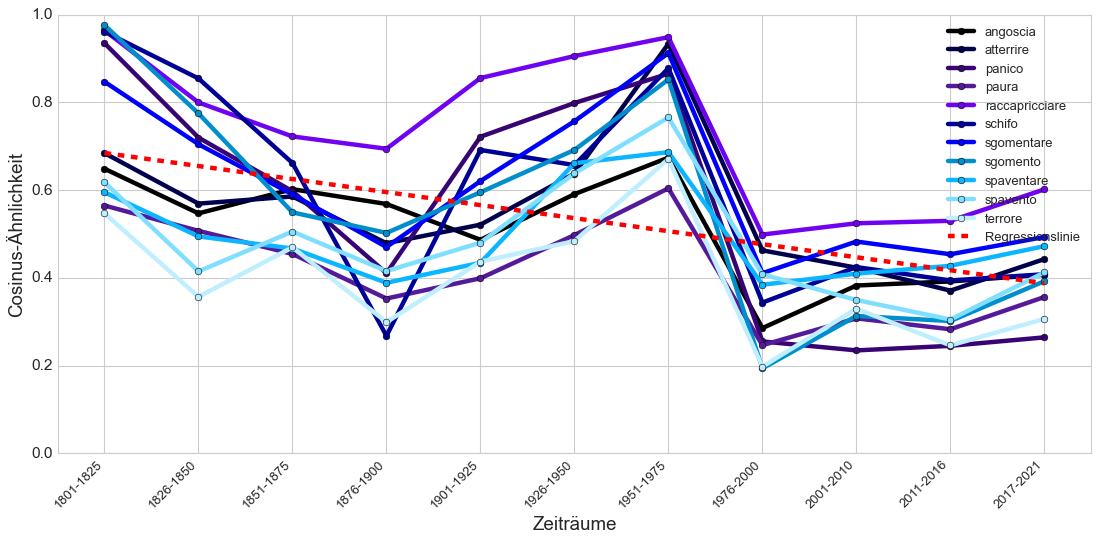

In [82]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

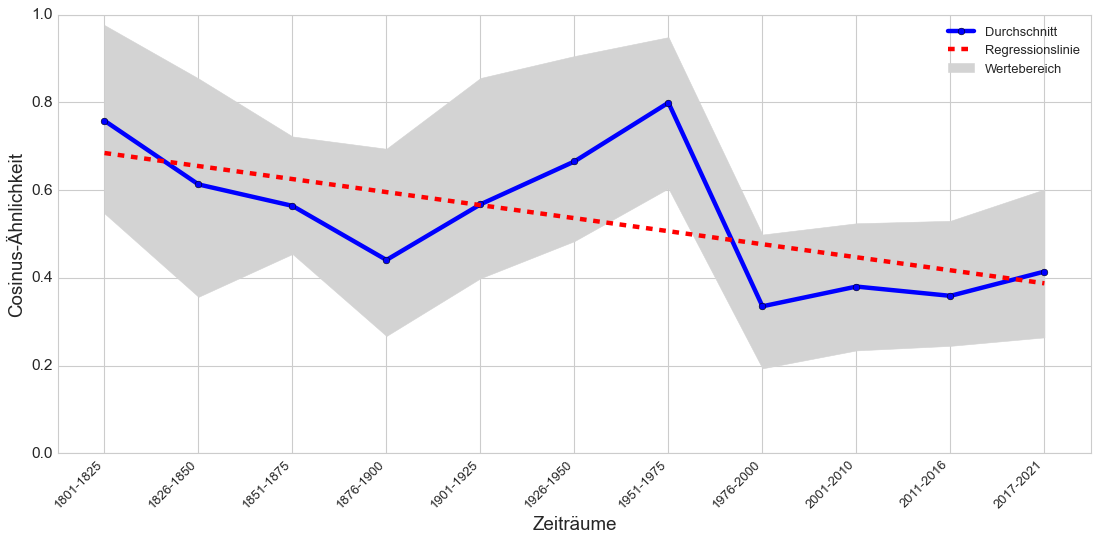

In [83]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()